In [ ]:
import pandas as pd
import numpy as np

#leer el data
#cargar el archivo: diabetes_cleaned.csv de la siguiente carpeta de drive: https://drive.google.com/drive/folders/1vbFCnNA5rtDsH39dIAZ1mxsC7W2VlfVY?usp=drive_link

diabetes_cleaned = pd.read_csv('/content/diabetes_cleaned.csv')

In [ ]:
#INSTALAR MLFLOW Y PYNGROK
!pip install mlflow pyngrok --quiet

#En este apartado use chatgpt para entender como funcionaba mlflow y ngrok, también para generar código de impresión de métricas

In [ ]:
# 2. Importar librerías
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, mean_absolute_error, precision_score, recall_score, f1_score, mean_squared_error, roc_curve,
    confusion_matrix, ConfusionMatrixDisplay)

from pyngrok import ngrok
import pandas as pd

import joblib
import os
import matplotlib.pyplot as plt

In [ ]:
# 4. Establecer el experimento

mlflow.set_tracking_uri("databricks auth login")
mlflow.set_tracking_uri("file:/content/mlruns")
mlflow.set_experiment("modelo_diabetes")
ngrok.set_auth_token("2wzPMwd9GV5Gmt8tAb8x3beLz2o_7Vr99HUFWwZjBJudxs13w")

mlflow_ui = ngrok.connect(5000)

get_ipython().system_raw("mlflow ui --port 5000 &")

print("MLflow UI disponible en:", mlflow_ui)

MLflow UI disponible en: NgrokTunnel: "https://1caf-35-243-140-185.ngrok-free.app" -> "http://localhost:5000"


/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference tim

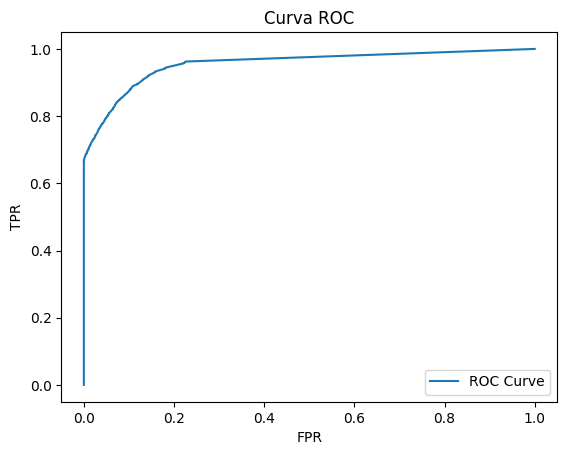

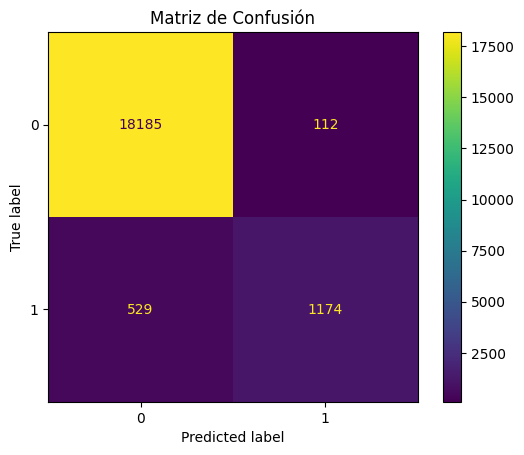

In [ ]:

# 5. Dividir los datos
X = diabetes_cleaned[['hbA1c_level', 'blood_glucose_level', 'age', 'bmi']]
y = diabetes_cleaned['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Iniciar un run y registrar todo
with mlflow.start_run():
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

#metricas
    acc = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("mae", mae)
    mlflow.log_param("random_state", 42)

    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("mse", mse)


    # Guardar modelo
    model_path = "modelo_rf.pkl"
    joblib.dump(model, model_path)
    mlflow.log_artifact(model_path)

    # Guardar dataset
    diabetes_cleaned.to_csv("diabetes_logged.csv", index=False)
    mlflow.log_artifact("diabetes_logged.csv")

    # Curva ROC
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Curva ROC")
    plt.legend()
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.title("Matriz de Confusión")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Guardar predicciones
    pred_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
    pred_df.to_csv("predicciones.csv", index=False)
    mlflow.log_artifact("predicciones.csv")


    mlflow.sklearn.log_model(model, "modelo_random_forest", input_example=X.iloc[:2])







In [ ]:
# Exponer el servidor local con ngrok
ngrok.set_auth_token("2wzPMwd9GV5Gmt8tAb8x3beLz2o_7Vr99HUFWwZjBJudxs13w")
public_url = ngrok.connect(5000)
print(f"MLflow UI disponible en: {public_url}")

# Lanzar la interfaz web de MLflow
os.system("mlflow ui --port 5000 &")

MLflow UI disponible en: NgrokTunnel: "https://a187-35-243-140-185.ngrok-free.app" -> "http://localhost:5000"


0